In [19]:
import pyneuralnet as nn
import matplotlib.pyplot as plt
import numpy as np
import pickle
import time
from typing import List, Any
np.random.seed(123)

In [20]:
class Data(nn.abstract.DataSource2D):
    _train_in : List[Any]
    _train_out : List[Any]

    def __init__(self):
        super().__init__()
        train_in, _ = pickle.load(open('data/mnist_preprocessed.pickle', 'rb'))
        self._train_in = [np.reshape(x, (28,28,1)).astype(np.float32) for x in train_in]
        self._train_out = [np.reshape(x, (28,28,1)).astype(np.float32) for x in train_in]

    def size(self):
        return 1

    def sample(self, idx : int):
        i = np.random.randint(0, len(self._train_in))
        return (self._train_in[i], self._train_out[i])

In [21]:
N = 10000
a = 0.00001

In [22]:
model = nn.compound.Sequence(
    nn.compound.UNet(1, 0.6, 0.9, 0.999, True),
    nn.convolution.Conv2D(2, 1, 0.9, 0.999),
    nn.convolution.Sigmoid2D()
)
# model = nn.compound.Sequence(
#     nn.convolution.Conv2D(1,3,0.9,0.999),
#     nn.normalize.BatchRenorm2D(1,0.8,0.9,0.999),
#     nn.convolution.ReLU2D(),
#     nn.convolution.Conv2D(3,1,0.9,0.999),
#     nn.normalize.BatchRenorm2D(1,0.8,0.9,0.999),
#     nn.convolution.ReLU2D(),
# )
# model = nn.compound.UNet(1, 0.8, 0.9, 0.999, True)
data = Data()
loss = nn.loss.L2()
trainer = nn.training.Trainer2D(model, data, loss)

In [23]:
sample = data.sample(0)

In [24]:
sample[0].shape

(28, 28, 1)

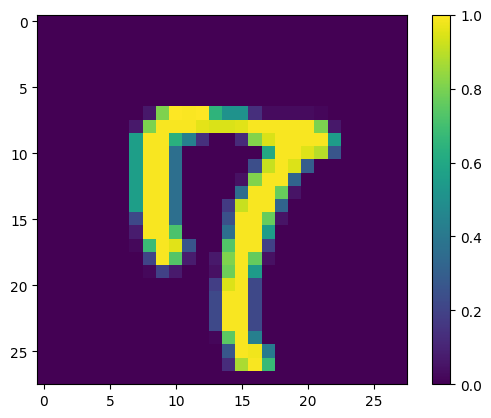

In [25]:
plt.imshow(sample[0])
plt.colorbar()

(28, 28, 1)

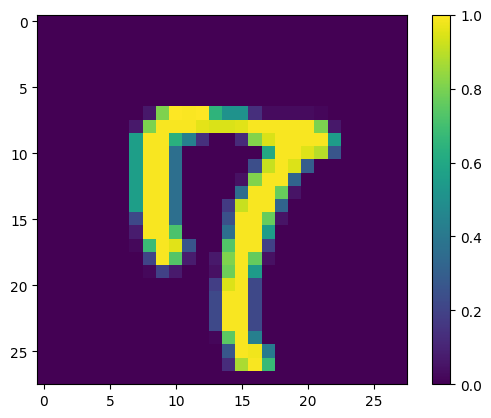

In [26]:
plt.imshow(sample[1])
plt.colorbar()
sample[1].shape

In [27]:
out = model.forward(sample[0])

(28, 28, 1)

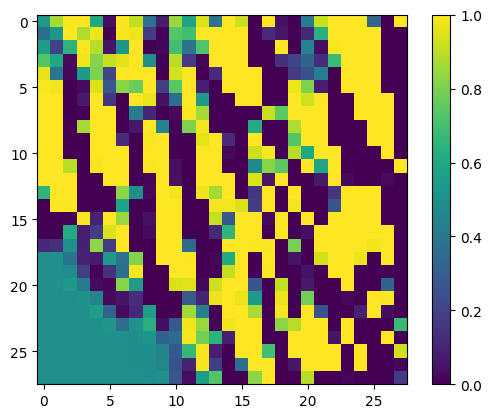

In [28]:

plt.imshow(out)
plt.colorbar()
out.shape

(28, 28, 1)

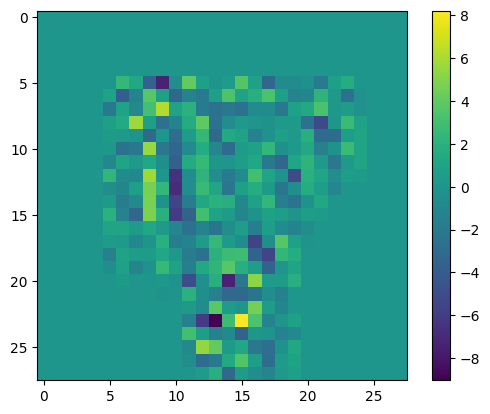

In [29]:
b = model.backward(out - sample[1])
plt.imshow(b)
plt.colorbar()
b.shape

Training of model complete in 0.0046955293893814086 seconds per epoch, 4.6955293893814085 milliseconds per sample.


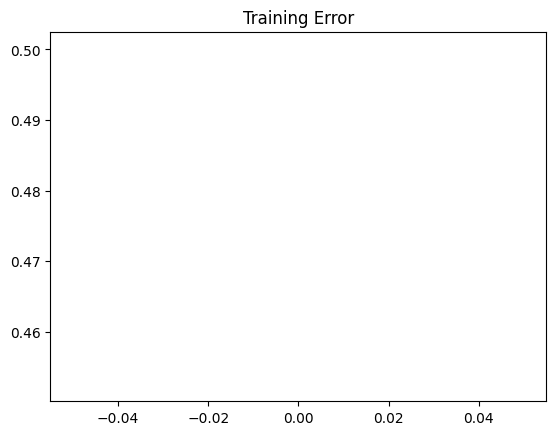

In [30]:
ts = time.time()
errors = trainer.train(N, a)
duration = time.time() - ts
print(f"Training of model complete in {duration / N} seconds per epoch, {duration * 1000 / (N * data.size())} milliseconds per sample.")

plt.title("Training Error")
plt.plot(range(len(errors)), errors)
plt.show()

In [31]:
sample = data.sample(234)

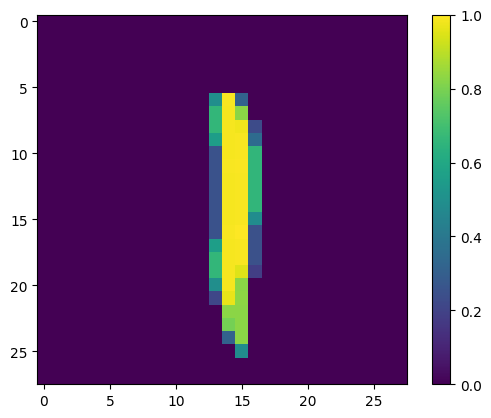

In [32]:
plt.imshow(sample[0])
plt.colorbar()

In [33]:
out = model.forward(sample[0])
out.shape

(28, 28, 1)

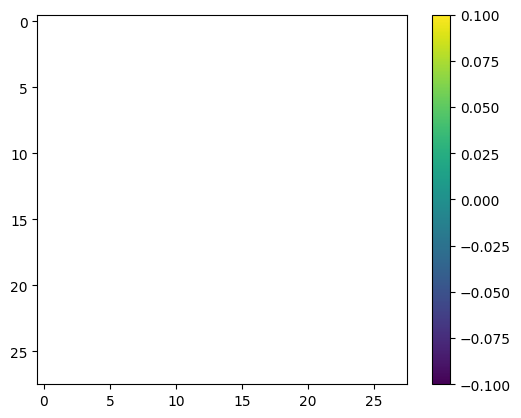

In [34]:
plt.imshow(out)
plt.colorbar()

In [35]:
import pickle

bts = pickle.dumps(model)
sour_model = pickle.loads(bts)
out2 = sour_model.forward(sample[0])
diff = abs(out - out2)
print(f"{np.min(diff)} - {np.mean(diff)} - {np.max(diff)}")

nan - nan - nan


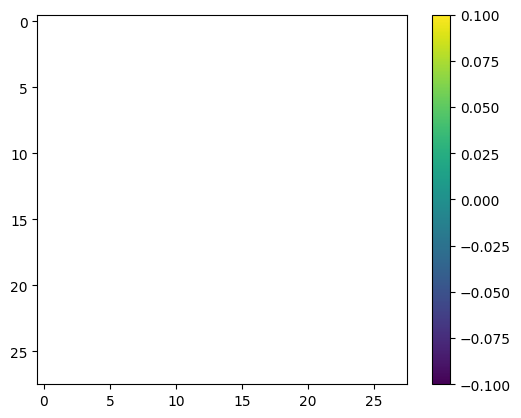

In [36]:
plt.imshow(out2)
plt.colorbar()